# Heart-Disease Classification

## Dataset

#### Attribute Information:
#### The dataset has 14 attributes
------------------------

-- 1. age: age in years

-- 2. sex: sex (1 = male; 0 = female)

-- 3. cp: chest pain type ((Value 0: typical angina; Value 1: atypical angina; Value 2: non-anginal pain; Value 3: asymptomatic))

-- 4. trestbps: resting blood pressure mm Hg on admission to the hospital.

-- 5. chol: serum cholesterol in mg/dl

-- 6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

-- 7. restecg: resting electrocardiographic results (Value 0: normal; Value 1: having ST-T wave abnormality; Value 2: probable 
or definite left ventricular hypertrophy).

-- 8. thalach: maximum heart rate achieved

-- 9. exang: exercise induced angina (1 = yes; 0 = no)

-- 10. oldpeak: ST depression induced by exercise relative to rest

-- 11. slope: the slope of the peak exercise ST segment (Value 0: upsloping; Value 1: flat; Value 2: downsloping)

-- 12. ca: number of major vessels (0-3) colored by flourosopy

-- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

-- 14. target: heart disease (1 = no, 2 = yes)

## Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

## Data Exploration

In [19]:
#Reading the data in a dataframe
df = pd.read_csv('data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [20]:
df.shape

(270, 14)

#### The dataset contains 14 columns, 5 are numerical and 9 are categorical. Also there are no null values in dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [23]:
df['target'].value_counts()

1    150
2    120
Name: target, dtype: int64

#### There is a good proportion between the two positive and negative cases

In [24]:
#Percent of people having and not having a heart disease
df['target'].value_counts()/df.shape[0]*100 

1    55.555556
2    44.444444
Name: target, dtype: float64

#### 56% people in the dataset have a heart disease

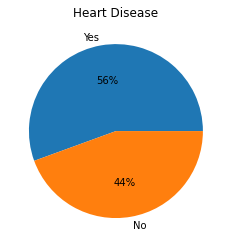

In [25]:
labels = ['Yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

## Exploratory Data Analysis (EDA)

#### Correlation Matrix

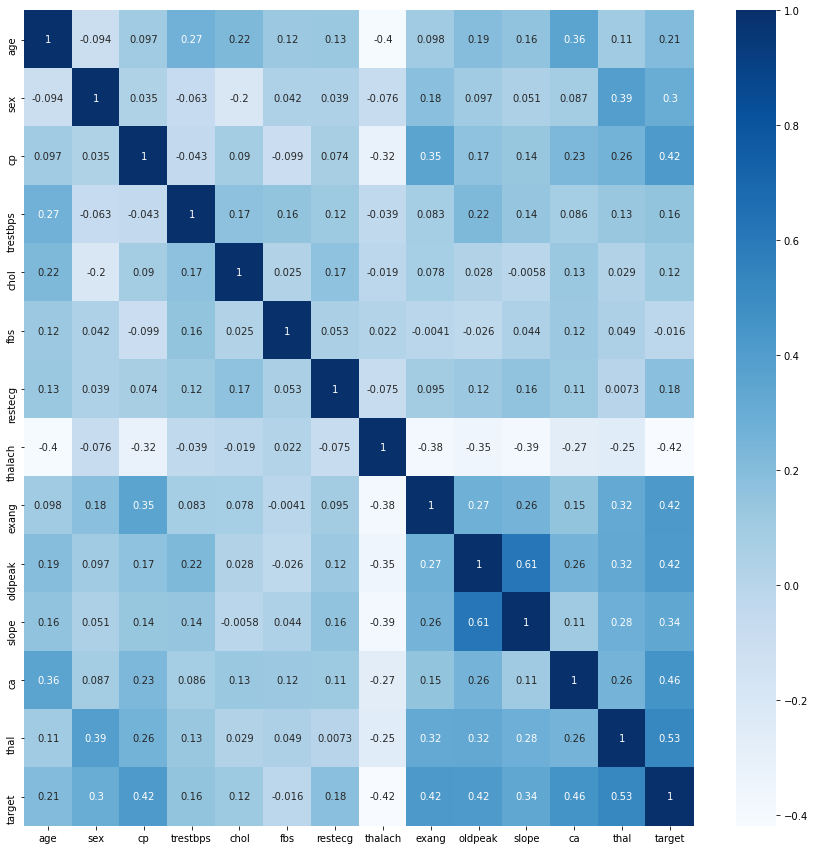

In [27]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

#### Next Steps:
    1. Explore the attributes and correlation between them. 
    2. Build, train and test a model based on the correlated attributes.
    3. Host the flask web application of our Heart Disease Classification.